# Лабораторная работа №7.
## Автоассоциативные сети с узким горлом.
### Выполнила: Михеева Кристина Олеговна
#### Группа М8О-407Б-20
##### Вариант: 15

## Цель работы
Целью работы является исследование свойств автоассоциативных сетей с узким горлом, алгоритмов обучения, а также применение сетей для выполнения линейного и нелинейного анализа главных компонент набора данных.


## Ход работы

## Задание 1
Использовать автоассоциативную сеть с узким горлом для отображения набора данных, выделяя первую главную компоненту данных.


In [120]:
!pip install pyrenn


In [121]:
import matplotlib.pyplot as plt
import pyrenn
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Формируем входные данные.

In [122]:
a = 0.5
b = 0.4
alpha = 0
x0 = 0.3
y0 = -0.1
h = 0.025

In [123]:
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / h))
x1 = a * np.cos(t + alpha) + x0
y1 = b * np.sin(t) + y0

In [124]:
arr1 = np.array([x1, y1])

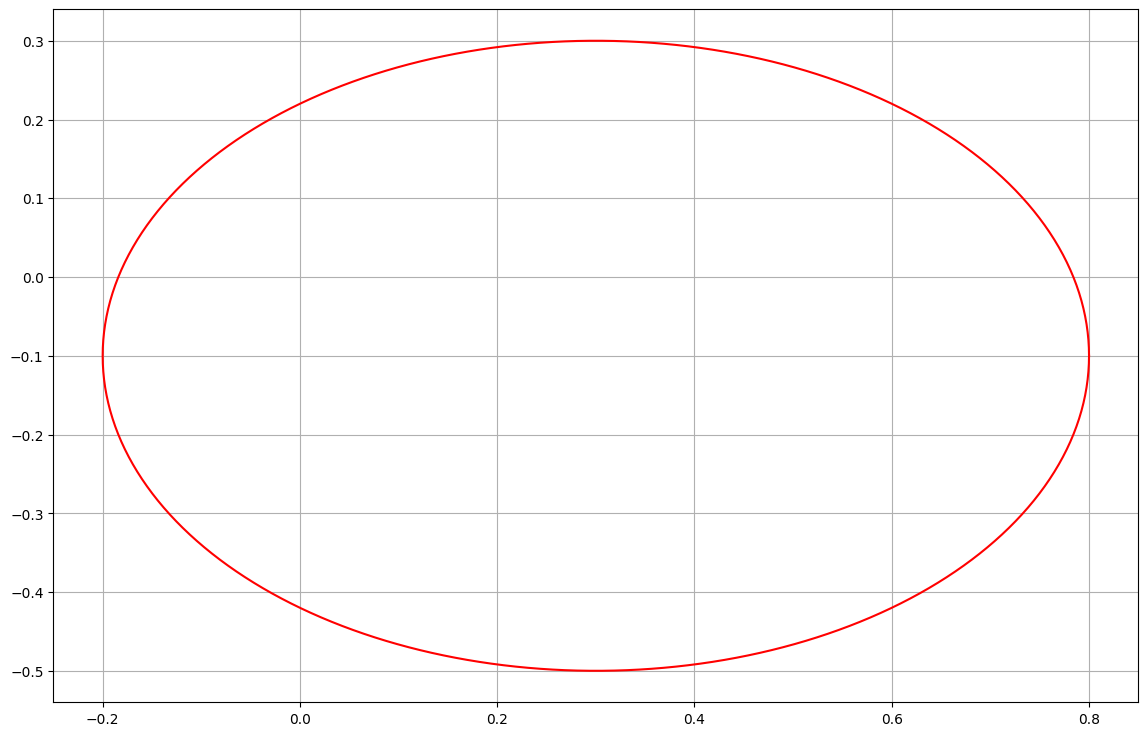

In [125]:
plt.figure(figsize=(14, 9))
plt.plot(arr1[0], arr1[1], c='r')
plt.grid()

Зададим нейронную сеть с 1 скрытым слоем и используем метод Левенберга-Марквардта в качестве алгоритма обучения.

In [126]:
nn = pyrenn.CreateNN([2, 1, 2])
nn = pyrenn.train_LM(arr1, arr1, nn, E_stop=1e-5, k_max=100)

Maximum number of iterations reached


Аппроксимируем функцию.

In [127]:
pred = pyrenn.NNOut(arr1, nn)

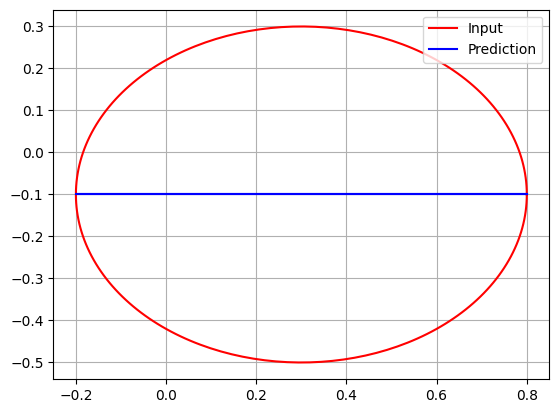

In [128]:
plt.plot(arr1[0], arr1[1], c='r', label = "Input")
plt.plot(pred[0], pred[1], c='b', label = "Prediction")
plt.grid()
plt.legend()
plt.show()

## Задание 2
Использовать автоассоциативную сеть с узким горлом для аппроксимации кривой на плоскости, выделяя первую нелинейную главную компоненту данных.

Сгенерируем набор из точек.

In [129]:
def get_func(t):
    r = (-3 * (t**2)) + 1
    return r * np.cos(t), r * np.sin(t)

In [130]:
x2, y2 = get_func(t)

In [131]:
arr2 = np.array([x2,y2])

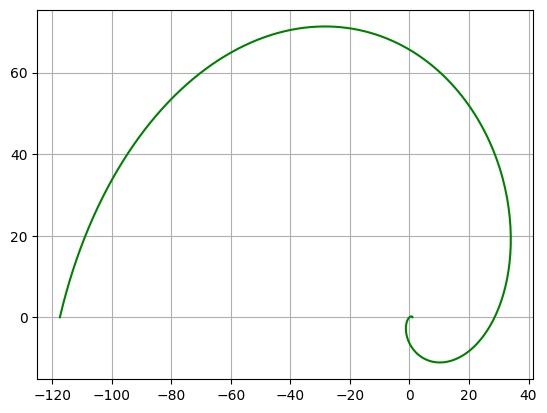

In [132]:
plt.plot(x2, y2, c='green')
plt.grid()
plt.show()

Обучим сеть.

In [133]:
nn2 = pyrenn.CreateNN([2, 10, 1,  10, 2])

In [134]:
nn2 = pyrenn.train_LM(arr2, arr2, nn2, E_stop=1e-5, k_max=2000)

Maximum number of iterations reached


Аппроксимируем функцию.

In [135]:
out2 = pyrenn.NNOut(arr2, nn2)

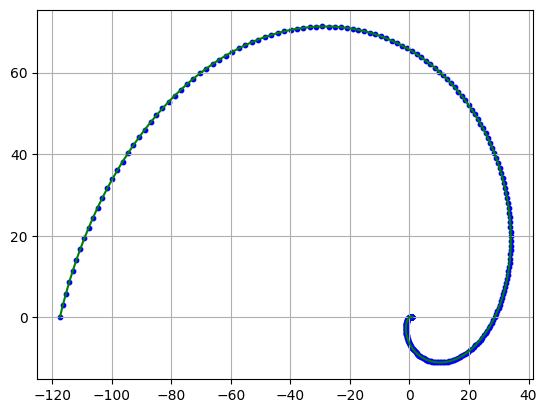

In [136]:
plt.plot(x2, y2, c='green')
plt.scatter(out2[0], out2[1],c='b', s=10)
plt.grid()

## Задание 3
Применить автоассоциативную сеть с узким горлом для аппроксимации пространственной кривой, выделяя старшие нелинейные главные компоненты данных.


Сгенерируем набор из точек.

In [137]:
phi = np.linspace(0, 2 * np.pi, int(2 * np.pi / h))
z = phi
arr3 = np.array([x2, y2, z])

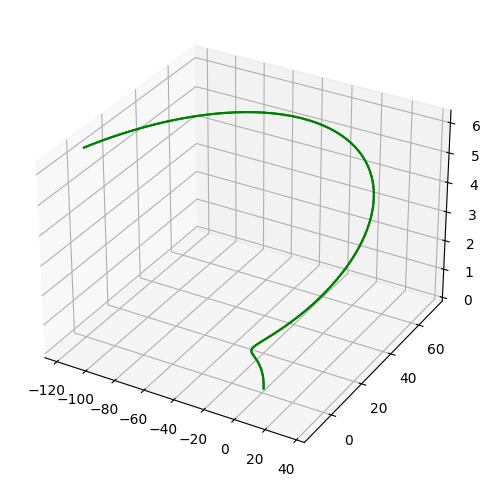

In [156]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x2, y2, np.array([z, z]), color='g')
plt.show()

Создадим и обучим сеть.

In [ ]:
nn3 = pyrenn.CreateNN([3, 10, 2, 10, 3])
nn3 = pyrenn.train_LM(arr3, arr3, nn3, E_stop=1e-5, k_max=1000)

Аппроксимируем функцию.

In [150]:
out3 = pyrenn.NNOut(arr3, nn3)

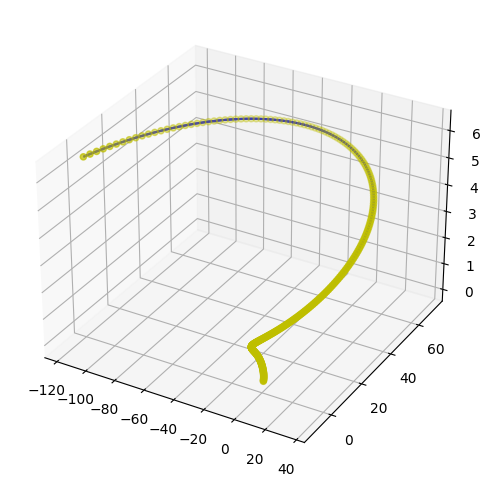

In [159]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(out3[0], out3[1], out3[2], color='y')
ax.plot_wireframe(x2, y2, np.array([z, z]), color='b')
plt.show()

 Отобразим обучающее множество и выход сети.

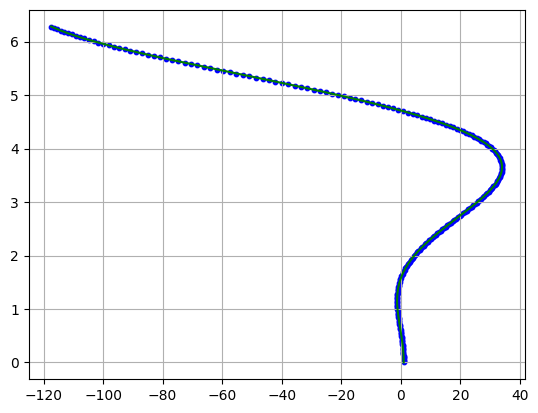

In [ ]:
plt.plot(x2,z, c='g')
plt.scatter(x2,out3[2], c='b', s = 10)
plt.grid()

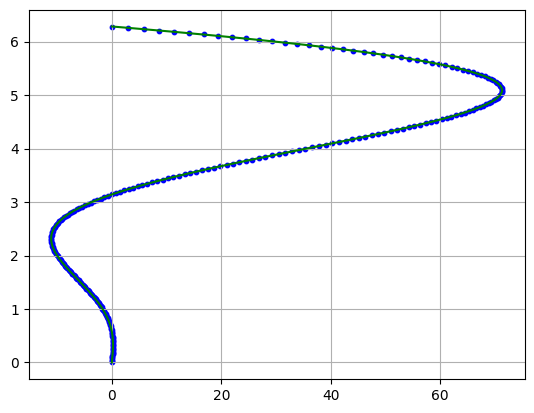

In [ ]:
plt.plot(y2, z, c='g')
plt.scatter(y2, out3[2], c='b', s=10)
plt.grid()

## Вывод
В данной лаборатоной работе я познакомилась с исследование свойств автоассоциативных сетей с узким горлом.

 По сути это такие нейронные сети, которые используются для решения задачи восстановления входных данных, что может быть полезным в различных областях, например как:  колоризация, шумоподавление, восстановление изображений, повышение качества и многое другое.